##POSTECH AI chemistry final assignment
>This software is developed by Taehyun Nam(POSTECH, Chem. Eng.)</br>Build in 2021.12.14.

Hybrid model is consists of five best performing ML model, and each model works simutaneously to generate individual prediction and those predictions are merged to calculate one unique prediction.
</br></br>
Please refer to the additional documentation for this hybrid model mechanism.


#####Package import section

In [ ]:
#install rdkit with kora
!pip install kora
import kora.install.rdkit

!pip install rdkit-pypi

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [38]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import random
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import ML
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import rdMolDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#####Data set pre-processing and Feature generation section

In [ ]:
#upload csv file or upload directly by using left located toolbar
from google.colab import files
uploaded = files.upload()

In [4]:
#read csv file and put into df array. KEEP MIND WITH ARRAY'S COLUMN AND ROW!
df=pd.read_csv('data_cat_modified.csv',sep=',',header=None)
#df[column][row], df[1][0] = flashpoint, not 1-aminopropan-2-ol

In [5]:
#Define calc module that can calculate whole rdkit descriptor
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])

In [ ]:
#If you curious about the RDkit descriptors list, please run this cell
descriptors_list = [x[0] for x in Descriptors._descList]
print(descriptors_list)

In [7]:
#Generating description dataset with rdkit.descriptor module.
#True values are needed to be assigned same position with descriptor vector

num_features = 104
num_dataset = 14000
epsilon = 1e-5

dataset = np.empty((0, num_features))

for i in range(num_dataset):
  mol = Chem.MolFromSmiles(df[3][i])
  vec = np.empty((1, num_features))
  desc = calc.CalcDescriptors(mol)
  for j in range(num_features):
    vec[0][j] = desc[104+j]
  vec[0][18] = epsilon #to eliminating molMR feature(overshooting)
  dataset = np.append(dataset, vec, axis = 0)

In [8]:
#data pre-processing, fill the NaN data field with epsilon value
for a in range(num_dataset):
  for b in range(num_features):
    if np.isnan(dataset[a][b]):
      dataset[a][b] = epsilon

In [9]:
#For normalization, fill the 0 data field with epsilon value
for j in range(num_dataset):
  for k in range(num_features):
    if(dataset[j][k]==0):
      dataset[j][k] += epsilon

In [10]:
#Separate dataset to training & testing
num_train = (int)(num_dataset*0.8)

fp_train = dataset[:num_train]
flashpoint_train = df[2][:num_train]
fp_test = dataset[num_train:num_dataset]
flashpoint_test = df[2][num_train:num_dataset]

In [ ]:
#Check out the feature set distribution
ax=sns.heatmap(fp_train, vmin=0, vmax=10)

###Module 1
#####Random forest section

In [12]:
#Duplicate train/test set for stability
fp_train_fo = fp_train.copy()
flashpoint_train_fo = flashpoint_train.copy()
fp_test_fo = fp_test.copy()
flashpoint_test_fo = flashpoint_test.copy()

In [41]:
#randomforest model generation and train using scikit learn package
#n_estimators parameter is the number of random tree
forest = RandomForestClassifier(n_estimators = 300)
forest.fit(fp_train_fo, flashpoint_train_fo)
forest_predictions = forest.predict(fp_test_fo)

In [ ]:
#Evaluate accuracy
count = 0
for y in range(len(forest_predictions)):
  if(forest_predictions[y]==flashpoint_test_fo[y+11200]):
    count = count + 1
print(count/len(forest_predictions))

In [ ]:
#Generating confusion matrix for evaluation
cm = confusion_matrix(flashpoint_test_fo, forest_predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(4)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

###Module 2
#####Decision tree section

In [16]:
#Duplicate train/test set for stability
fp_train_dt = fp_train.copy()
flashpoint_train_dt = flashpoint_train.copy()
fp_test_dt = fp_test.copy()
flashpoint_test_dt = flashpoint_test.copy()

In [17]:
#decision tree model generation and train using scikit learn package
#max_depth parameter is the number of decision tree
dtree_model = DecisionTreeClassifier(max_depth = 100)
dtree_model.fit(fp_train_dt, flashpoint_train_dt)
dtree_predictions = dtree_model.predict(fp_test_dt)

In [ ]:
#Evaluate accuracy
count = 0
for y in range(len(dtree_predictions)):
  if(dtree_predictions[y]==flashpoint_test_dt[y+11200]):
    count = count + 1
print(count/len(dtree_predictions))

In [ ]:
#Generating confusion matrix for evaluation
cm = confusion_matrix(flashpoint_test_dt, dtree_predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(4)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

###Model 3
#####KNN classifier section

In [20]:
#Duplicate train/test set for stability
fp_train_kn = fp_train.copy()
flashpoint_train_kn = flashpoint_train.copy()
fp_test_kn = fp_test.copy()
flashpoint_test_kn = flashpoint_test.copy()

In [21]:
#KNN model generation and train using scikit learn package
#n_neighbors parameter is the parameter about neighbor's number
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(fp_train_kn, flashpoint_train_kn)
knn_predictions = knn.predict(fp_test_kn)

In [ ]:
#Evaluate accuracy
count = 0
for y in range(len(knn_predictions)):
  if(knn_predictions[y]==flashpoint_test_kn[y+11200]):
    count = count + 1
print(count/len(knn_predictions))

In [ ]:
#Generating confusion matrix for evaluation
cm = confusion_matrix(flashpoint_test_kn, knn_predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(4)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

###Prediction merge module(ensemble)
#####Ensemble by voting algorithm

In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
soft_vote  = VotingClassifier([('fr',forest),('dt',dtree_model),('knn',knn)], voting='soft')
soft_vote = soft_vote.fit(fp_train, flashpoint_train)

In [33]:
ensemble_pred = soft_vote.predict(fp_test)

In [34]:
#Evaluate accuracy
count = 0
for y in range(len(ensemble_pred)):
  if(ensemble_pred[y]==flashpoint_test_kn[y+11200]):
    count = count + 1
print(count/len(ensemble_pred))

0.9139285714285714


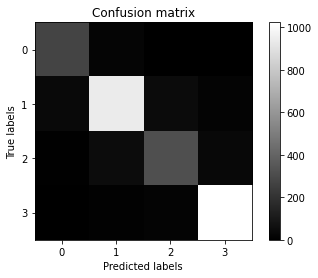

In [35]:
#Generating confusion matrix for evaluation
cm = confusion_matrix(flashpoint_test_dt, ensemble_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(4)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

###Prediction merge module
#####Merge by random weighted average

In [24]:
forest_test_pred = forest.predict(fp_train)
dtree_test_pred = dtree_model.predict(fp_train)
knn_test_pred = knn.predict(fp_train)

In [25]:
pred_final = np.zeros((1, 11200))

In [26]:
#Randomly generage weight to calculate weighted average of prediction of train dataset
n_iter = 3000

parameters = np.zeros((4, n_iter))

for b in range(n_iter):
  same = 0
  different = 0
  true = 0
  false = 0
  w1 = random()
  w2 = random()
  w3 = random()
  for a in range(11200):
    if((forest_test_pred[a]==dtree_test_pred[a])and
      (dtree_test_pred[a]==knn_test_pred[a])and
      (knn_test_pred[a]==forest_test_pred[a])):
      pred_final[0][a] = forest_test_pred[a]
      same = same + 1
    else:
      different = different + 1
      pred_final[0][a] = round((w1*forest_test_pred[a]+w2*dtree_test_pred[a]+w3*knn_test_pred[a])/(w1+w2+w3))
    if(pred_final[0][a]==flashpoint_train[a]):
      true = true + 1
    else:
      false = false + 1
  parameters[0][b] = true/11200
  parameters[1][b] = w1
  parameters[2][b] = w2
  parameters[3][b] = w3

In [ ]:
print(parameters[0][np.argmax(parameters[0])])

In [ ]:
#Calculate final prediction with given weight above
pred_final_test = np.zeros((1, 2800))

same = 0
different = 0
true = 0
false = 0
w1 = parameters[1][np.argmax(parameters[0])]
w2 = parameters[2][np.argmax(parameters[0])]
w3 = parameters[3][np.argmax(parameters[0])]
for a in range(2800):
  if((forest_predictions[a]==dtree_predictions[a])and
    (dtree_predictions[a]==knn_predictions[a])and
    (knn_predictions[a]==forest_predictions[a])):
    pred_final_test[0][a] = forest_predictions[a]
    same = same + 1
  else:
    different = different + 1
    pred_final_test[0][a] = round((w1*forest_predictions[a]+w2*dtree_predictions[a]+w3*knn_predictions[a])/(w1+w2+w3))
  if(pred_final_test[0][a]==flashpoint_test_dt[11200+a]):
    true = true + 1
  else:
    false = false + 1
print(true/2800)

In [ ]:
#Generating confusion matrix for evaluation
pred_final_test = np.ravel(pred_final_test, order='C')
cm = confusion_matrix(flashpoint_test_fo, pred_final_test)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(4)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
#simple average result, just for test
pred_final_test = np.zeros((1, 2800))
same = 0
different = 0
true = 0
false = 0
w1 = 1
w2 = 1
w3 = 1
for a in range(2800):
  if((forest_predictions[a]==dtree_predictions[a])and
    (dtree_predictions[a]==knn_predictions[a])and
    (knn_predictions[a]==forest_predictions[a])):
    pred_final_test[0][a] = forest_predictions[a]
    same = same + 1
  else:
    different = different + 1
    pred_final_test[0][a] = round((w1*forest_predictions[a]+w2*dtree_predictions[a]+w3*knn_predictions[a])/(w1+w2+w3))
  if(pred_final_test[0][a]==flashpoint_test_dt[11200+a]):
    true = true + 1
  else:
    false = false + 1
print(true/2800)

In [ ]:
#Generating confusion matrix for evaluation
pred_final_test = np.ravel(pred_final_test, order='C')
cm = confusion_matrix(flashpoint_test_fo, pred_final_test)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(4)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

###Model feature check part(don't have to run in unnecessary case.)

In [ ]:
acc_temp = np.zeros(104)

for t in range(num_features):
  fp_train_fo = fp_train.copy()
  flashpoint_train_fo = flashpoint_train.copy()
  fp_test_fo = fp_test.copy()
  flashpoint_test_fo = flashpoint_test.copy()
  for v in range(11200):
    fp_train_fo[v][t] = epsilon
  for q in range(2800):
    fp_test_fo[q][t] = epsilon
  forest = RandomForestClassifier(n_estimators = 300)
  forest.fit(fp_train_fo, flashpoint_train_fo)
  forest_predictions = forest.predict(fp_test_fo)
  count = 0
  for y in range(len(forest_predictions)):
    if(forest_predictions[y]==flashpoint_test_fo[y+11200]):
      count = count + 1
  print(t,'번째 feature를 지우면 정확도는',count/len(forest_predictions))
  acc_temp[t] = count/len(forest_predictions)